###**Studi Kasus 03 - Kelompok 03**
1. Silvia Zahro (11210940000028)
2. Fadli Naufal Ardianto (11210940000005)
3. Lariesa Ananda Putri (11210940000006)
4. Intan Syafitri (11210940000025)
5. Ananda Aprilia (11210940000032)
6. Antya Alhikmah Alham (11210940000033)




In [194]:
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [195]:
#Import Data-Loading Data kota Depok, Tangerang, dan Jakarta

import pandas as pd

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-CaseStudies/main/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-CaseStudies/main/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-CaseStudies/main/data/tangerang.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfD.shape, dfT.shape

((1024, 26), (998, 26), (128, 26))

In [196]:
dfJ

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
dfD

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
dfT

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **A. Gabungkan Data dfJ dan dfD**

In [199]:
JD = pd.concat([dfJ, dfD])
JD

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Preprocessing**

#1. Missing Value

In [200]:
JD.isnull().sum()

created_at     1782
LT             1781
LB             1783
KT             1783
KM             1783
garasi         1953
carport        1838
lokasi         1783
sertifikat     1785
listrik        1799
hadap          1924
harga          1783
URL            1783
deskripsi      1792
Unnamed: 14    2022
Unnamed: 15    2022
Unnamed: 16    2022
Unnamed: 17    2022
Unnamed: 18    2022
Unnamed: 19    2022
Unnamed: 20    2022
Unnamed: 21    2022
Unnamed: 22    2022
Unnamed: 23    2022
Unnamed: 24    2022
Unnamed: 25    2022
dtype: int64

Karena pada Unnamed 14-25 terdapat lebih Missing Value maka kita hilangkan kolom Unnamed 14-25 tersebut menggunakan drop

In [201]:
#Menghapus kolom yang berisi NaN
MV = JD.dropna(axis=1, how='all')
MV

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Karena dari baris ke-122

In [202]:
#Menghapus baris yang berisi NaN
MF = MV.dropna(axis=0, how='all')
MF

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,4-12-2021,40,40.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Timur,1.950000e+02,https://www.rumah123.com/properti/depok/hos928...,rumah semi minimalis manis harga ekonomis di c...
116,4-12-2021,50,50.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Selatan,1.850000e+02,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...
117,4-12-2021,100,15.0,3.0,3.0,1.0,1.0,Cinere,SHM,3500.0,NaN,1.750000e+03,https://www.rumah123.com/properti/depok/hos928...,Dijual cepat rumah bagus siap huni
120,NOTE:,- lokasi yang kami gunakan hanya per kecamatan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
import numpy as np
mean = MF["harga"].mean()
MF["harga"] = MF["harga"].replace(np.nan, mean)
MF

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,4-12-2021,40,40.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Timur,1.950000e+02,https://www.rumah123.com/properti/depok/hos928...,rumah semi minimalis manis harga ekonomis di c...
116,4-12-2021,50,50.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Selatan,1.850000e+02,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...
117,4-12-2021,100,15.0,3.0,3.0,1.0,1.0,Cinere,SHM,3500.0,NaN,1.750000e+03,https://www.rumah123.com/properti/depok/hos928...,Dijual cepat rumah bagus siap huni
120,NOTE:,- lokasi yang kami gunakan hanya per kecamatan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.549375e+09,NaN,NaN


- LT (Luas Tanah) : Besarnya luas tanah rumah.
- LB (Luas Bangunan) : Besarnya luas bangunan rumah.
- KT (Kamar Tidur) : Jumlah kamar tidur yang tersedia.
- KM (Kamar Mandi) : Jumlah kamar mandi yang tersedia.
- Garasi : Banyaknya mobil yang dapat diparkir didalam garasi.
- Carpot : Banyaknya mobil yang dapat diparkir di luar rumah.
- Lokasi : Letak rumah.
- Sertifikat : Memberi tahu kepemilikan rumah.
- Listrik : Besarnya daya listrik rumah.
- Hadap : Menjelaskan arah posisi rumah.
- Harga : Harga rumah.
- URL : Sumber info mengenai data.
- Deskripsi : Penjelasan lain mengenai rumah

In [204]:
dfJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   121 non-null    object 
 1   LT           121 non-null    float64
 2   LB           121 non-null    float64
 3   KT           121 non-null    float64
 4   KM           121 non-null    float64
 5   garasi       44 non-null     float64
 6   carport      90 non-null     float64
 7   lokasi       121 non-null    object 
 8   sertifikat   119 non-null    object 
 9   listrik      120 non-null    float64
 10  hadap        36 non-null     object 
 11  harga        121 non-null    float64
 12  URL          121 non-null    object 
 13  deskripsi    112 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unname

In [205]:
#MENGOREKSI TIPE VARIABEL KOTA JAKARTA
dfJ['sertifikat'] = dfJ['sertifikat'].astype('category')
dfJ['hadap'] = dfJ['hadap'].astype('category')
dfJ['lokasi'] = dfJ['lokasi'].astype('category')
dfJ['created_at'] = dfJ['created_at'].astype('category')
dfJ['URL'] = dfJ['URL'].astype('category')
dfJ['deskripsi'] = dfJ['deskripsi'].astype('category')
dfJ.dtypes

created_at     category
LT              float64
LB              float64
KT              float64
KM              float64
garasi          float64
carport         float64
lokasi         category
sertifikat     category
listrik         float64
hadap          category
harga           float64
URL            category
deskripsi      category
Unnamed: 14     float64
Unnamed: 15     float64
Unnamed: 16     float64
Unnamed: 17     float64
Unnamed: 18     float64
Unnamed: 19     float64
Unnamed: 20     float64
Unnamed: 21     float64
Unnamed: 22     float64
Unnamed: 23     float64
Unnamed: 24     float64
Unnamed: 25     float64
dtype: object

In [206]:
dfD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   119 non-null    object 
 1   LT           120 non-null    object 
 2   LB           118 non-null    float64
 3   KT           118 non-null    float64
 4   KM           118 non-null    float64
 5   garasi       25 non-null     float64
 6   carport      94 non-null     float64
 7   lokasi       118 non-null    object 
 8   sertifikat   118 non-null    object 
 9   listrik      103 non-null    float64
 10  hadap        62 non-null     object 
 11  harga        118 non-null    float64
 12  URL          118 non-null    object 
 13  deskripsi    118 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [207]:
#MENGOREKSI TIPE VARIABEL KOTA DEPOK
dfD['sertifikat'] = dfD['sertifikat'].astype('category')
dfD['hadap'] = dfD['hadap'].astype('category')
dfD['lokasi'] = dfD['lokasi'].astype('category')
dfD['created_at'] = dfD['created_at'].astype('category')
dfD['URL'] = dfD['URL'].astype('category')
dfD['deskripsi'] = dfD['deskripsi'].astype('category')
dfD.dtypes

created_at     category
LT               object
LB              float64
KT              float64
KM              float64
garasi          float64
carport         float64
lokasi         category
sertifikat     category
listrik         float64
hadap          category
harga           float64
URL            category
deskripsi      category
Unnamed: 14     float64
Unnamed: 15     float64
Unnamed: 16     float64
Unnamed: 17     float64
Unnamed: 18     float64
Unnamed: 19     float64
Unnamed: 20     float64
Unnamed: 21     float64
Unnamed: 22     float64
Unnamed: 23     float64
Unnamed: 24     float64
Unnamed: 25     float64
dtype: object

In [208]:
dfT.info()
#MENGOREKSI TIPE VARIABEL KOTA TANGERANG
dfT['sertifikat'] = dfT['sertifikat'].astype('category')
dfT['hadap'] = dfT['hadap'].astype('category')
dfT['lokasi'] = dfT['lokasi'].astype('category')
dfT['created_at'] = dfT['created_at'].astype('category')
dfT['URL'] = dfT['URL'].astype('category')
dfT['deskripsi'] = dfT['deskripsi'].astype('category')
dfT.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   124 non-null    object 
 1   LT           124 non-null    float64
 2   LB           124 non-null    float64
 3   KT           124 non-null    float64
 4   KM           124 non-null    float64
 5   garasi       38 non-null     float64
 6   carport      92 non-null     float64
 7   lokasi       124 non-null    object 
 8   sertifikat   122 non-null    object 
 9   listrik      111 non-null    float64
 10  hadap        49 non-null     object 
 11  harga        124 non-null    float64
 12  URL          124 non-null    object 
 13  deskripsi    124 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

created_at     category
LT              float64
LB              float64
KT              float64
KM              float64
garasi          float64
carport         float64
lokasi         category
sertifikat     category
listrik         float64
hadap          category
harga           float64
URL            category
deskripsi      category
Unnamed: 14     float64
Unnamed: 15     float64
Unnamed: 16     float64
Unnamed: 17     float64
Unnamed: 18     float64
Unnamed: 19     float64
Unnamed: 20     float64
Unnamed: 21     float64
Unnamed: 22     float64
Unnamed: 23     float64
Unnamed: 24     float64
Unnamed: 25     float64
dtype: object

#2. Duplicated Data

Mengecek data duplikat 

In [209]:
print(MF.shape)
MF.duplicated().sum() #melihat jumlah duplicated data pada Data JT (Gabungan data Jakarta Tangerang)

(241, 14)


0

Karena adanya duplikat data pada Data JD maka dilakukan drop data untuk menghilangkan data yang duplikat

In [210]:
#menghapus entri yang memiliki data duplikat 
MF.drop_duplicates(inplace=True)
print(MF.duplicated().sum()) # menghitung jumlah data yang duplikat
print(MF.shape) # re-check by printing data size

0
(241, 14)


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


#3. Outlier

In [211]:
#outlier pada kolom wind_speed
# Deteksi Outlier menggunakan nilai IQR

Q1 = MF.harga.quantile(0.25)
Q3 = MF.harga.quantile(0.75)
IQR = Q3 - Q1
print('Q1 =', Q1)
print('Q2 =', Q3)
print('IQR =', IQR)

Q1 = 826.0
Q2 = 3500000000.0
IQR = 3499999174.0


In [212]:
# Menentukan batas bawah dan batas atas

batasBawah = Q1 - (1.5 * IQR)
batasAtas = Q3 + (1.5 * IQR)
print('batas bawah =', batasBawah)
print('batas atas =', batasAtas)

batas bawah = -5249997935.0
batas atas = 8749998761.0


Text(0.5, 1.0, 'Harga Boxplot')

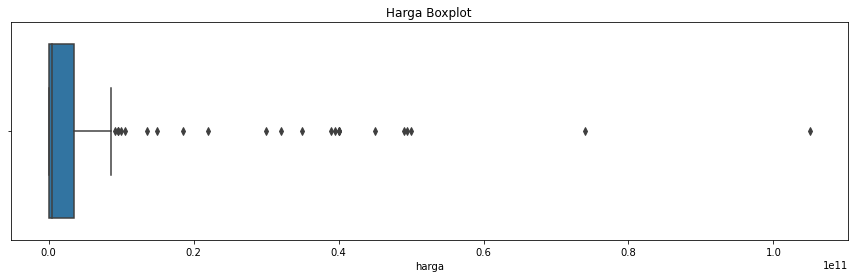

In [213]:
#Mengecek outlier menggunakan visualisasi boxplot
import matplotlib.pyplot as plt 
import seaborn as sns
fig, ax = plt.subplots(figsize = (15,4))
sns.boxplot(x = MF.harga).set_title('Harga Boxplot')

In [214]:
# Deteksi Outlier menggunakan nilai IQR
Q1 = MF.harga.quantile(0.25)
Q3 = MF.harga.quantile(0.75)
IQR = Q3 - Q1
print('Q1 =', Q1)
print('Q2 =', Q3)
print('IQR =', IQR)

Q1 = 826.0
Q2 = 3500000000.0
IQR = 3499999174.0


In [215]:
# Menentukan batas bawah dan batas atas

batasBawah = Q1 - (1.5 * IQR)
batasAtas = Q3 + (1.5 * IQR)
print('batas bawah =', batasBawah)
print('batas atas =', batasAtas)

batas bawah = -5249997935.0
batas atas = 8749998761.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


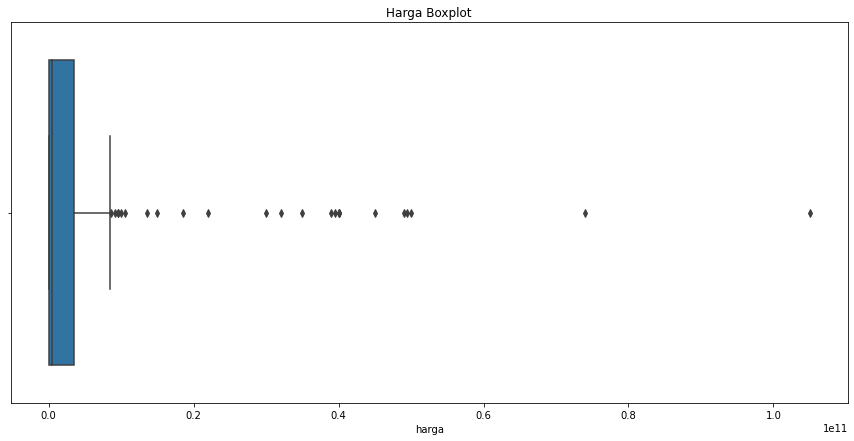

In [216]:
# handle outlier dengan replace menggantinya dengan nilai mean

MF['harga'] = MF.harga.mask(MF.harga > batasAtas, MF.harga.mean())
MF['harga'] = MF.harga.mask(MF.harga < batasBawah, MF.harga.mean())
fig, ax = plt.subplots(figsize = (15,7))
fig = sns.boxplot(x = MV.harga).set_title('Harga Boxplot')

#4. Statistika Deskriptif

In [217]:
0# Statistika Sederhana dari data "Numerik"-nya
MF.describe(include='all')

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
count,240,241,239.000000,239.000000,239.000000,69.000000,184.000000,239,237,223.000000,98,2.410000e+02,239,230
unique,23,151,NaN,NaN,NaN,NaN,NaN,16,8,NaN,11,NaN,238,214
top,5-12-2021,50,NaN,NaN,NaN,NaN,NaN,Sawangan,SHM,NaN,Utara,NaN,https://www.rumah.com/listing-properti/dijual-...,Rumah 2 Lantai 2 Bangunan Gaya Art Deco di Kot...
freq,74,12,NaN,NaN,NaN,NaN,NaN,30,206,NaN,29,NaN,2,4
mean,NaN,NaN,187.230126,3.514644,2.669456,1.826087,1.809783,NaN,NaN,3911.210762,NaN,1.723424e+09,NaN,NaN
std,NaN,NaN,232.416013,1.712165,1.570322,1.464848,1.285358,NaN,NaN,6057.190639,NaN,2.238393e+09,NaN,NaN
min,NaN,NaN,15.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,900.000000,NaN,4.100000e+01,NaN,NaN
25%,NaN,NaN,51.000000,2.000000,2.000000,1.000000,1.000000,NaN,NaN,2200.000000,NaN,8.260000e+02,NaN,NaN
50%,NaN,NaN,100.000000,3.000000,2.000000,1.000000,2.000000,NaN,NaN,2200.000000,NaN,4.200000e+08,NaN,NaN
75%,NaN,NaN,246.500000,4.500000,4.000000,2.000000,2.000000,NaN,NaN,3500.000000,NaN,3.500000e+09,NaN,NaN


#5. Visualisasi

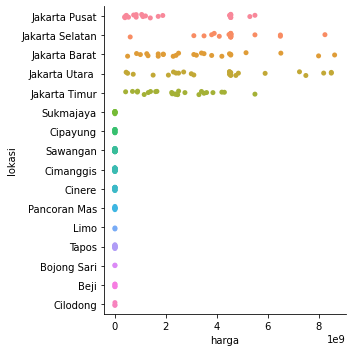

In [218]:
p = sns.catplot(x="harga", y="lokasi", data=MF)

  Interpretasi:

  Dari tampilan di atas, dapat diasumsikan bahwa harga rumah yang berlokasi di Ibukota cenderung memiliki harga yang lebih tinggi dibandingkan harga rumah yang berlokasi di luar Ibukota. Oleh karena itu, kami menyarankan untuk membeli rumah di daerah luar Ibukota jika rumah tersebut masih memiliki fasilitas yang lengkap.

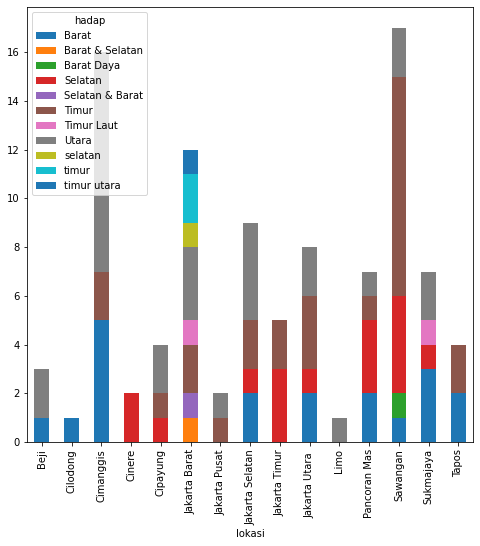

In [219]:
CT = pd.crosstab(index=MF["lokasi"], columns=MF["hadap"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)

Intertpretasi :

Berdasarkan tampilan di atas, dapat diasumsikan bahwa rumah yang menghadap ke Barat cenderung lebih banyak berada di lokasi Cimanggis. Hal ini memudahkan bagi orang muslim dalam beribadah. Sehingga kami menyarankan untuk orang muslim membeli rumah di Cimanggis.

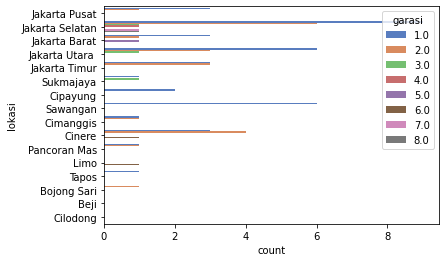

In [220]:
ax = sns.countplot(y = 'lokasi', hue = 'garasi', palette = 'muted', data=MF)

Interpretasi : 

Rumah yang berada di Sawangan cenderung memiliki jumlah garasi yang hampir sama dengan jumlah garasi di Jakarta Utara. Yang di mana harga rumah di Sawangan cenderung lebih murah dibandingkan dengan rumah di Jakarta Utara. Dengan demikian, ini menjadi peluang untuk mendapatkan rumah dengan harga yang cenderung murah namun memiliki garasi yang banyak.

# **B. Gabungkan Data dfJ dan dfT**

In [221]:
JT = pd.concat([dfJ, dfT])
JT

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#**1. Missing Value**

In [222]:
JT.isnull().sum()

created_at      907
LT              907
LB              907
KT              907
KM              907
garasi         1070
carport         970
lokasi          907
sertifikat      911
listrik         921
hadap          1067
harga           907
URL             907
deskripsi       916
Unnamed: 14    1152
Unnamed: 15    1152
Unnamed: 16    1152
Unnamed: 17    1152
Unnamed: 18    1152
Unnamed: 19    1152
Unnamed: 20    1152
Unnamed: 21    1152
Unnamed: 22    1152
Unnamed: 23    1152
Unnamed: 24    1152
Unnamed: 25    1152
dtype: int64

Dapat dilihat pada output di atas, bahwa terdapat MV pada kolom Unnamed 14 sampai Unnamed 25, maka kita hilangkan kolom Unnamed 14 sampai Unnamed 25 tersebut menggunakan fungsi drop

In [223]:
MVJT = JT.dropna(axis=1, how='all')
MVJT

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,NaN,1.000000e+03,https://www.rumah123.com/properti/tangerang/ho...,Akses Mudah: 10 Menit Ke stasiun kereta poris ...
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#**2. Duplicate Data**

In [224]:
MFJT = MVJT.dropna(axis=0, how='all')
MFJT

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,12-08-2021,60.0,55.0,2.0,2.0,NaN,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,NaN,7.110000e+02,https://www.rumah123.com/properti/tangerang/ho...,"Lokasi sangat dekat dengan berbagai Akses,Ters..."
120,12-08-2021,66.0,70.0,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,NaN,8.500000e+02,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,Barat,1.860000e+03,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,NaN,1.800000e+03,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d..."


In [225]:
print(MFJT.shape)
MFJT.duplicated().sum() #melihat jumlah duplicated data pada Data JT (Gabungan data Jakarta Tangerang)

(245, 14)


0

In [226]:
#menghapus entri yang memiliki data duplikat 
MFJT.drop_duplicates(inplace=True)
print(MFJT.duplicated().sum()) # menghitung jumlah data yang duplikat
print(MFJT.shape) # re-check by printing data size

0
(245, 14)


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


#**3. Outlier**

Text(0.5, 1.0, 'Harga')

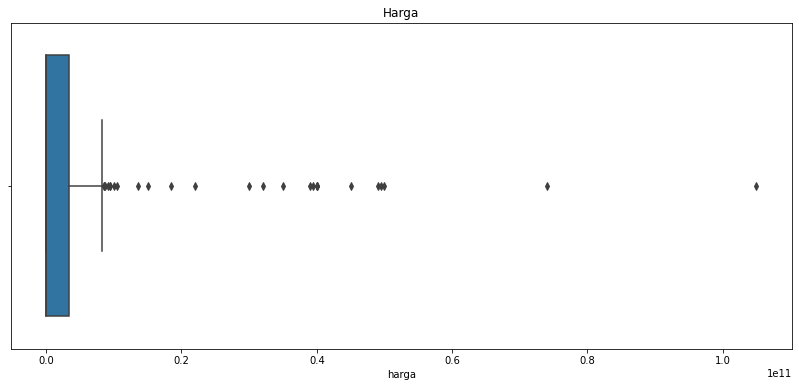

In [227]:
fig, ax = plt.subplots(figsize = (14,6))
sns.boxplot(x = MFJT.harga).set_title('Harga')

In [228]:
# Deteksi Outlier menggunakan nilai IQR

Q1 = MFJT.harga.quantile(0.25)
Q3 = MFJT.harga.quantile(0.75)
IQR = Q3 - Q1
print('Q1 =', Q1)
print('Q2 =', Q3)
print('IQR =', IQR)

Q1 = 1950.0
Q2 = 3400000000.0
IQR = 3399998050.0


In [229]:
# Menentukan batas bawah dan batas atas

batasBawah = Q1 - (1.5 * IQR)
batasAtas = Q3 + (1.5 * IQR)
print('batas bawah =', batasBawah)
print('batas atas =', batasAtas)

batas bawah = -5099995125.0
batas atas = 8499997075.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


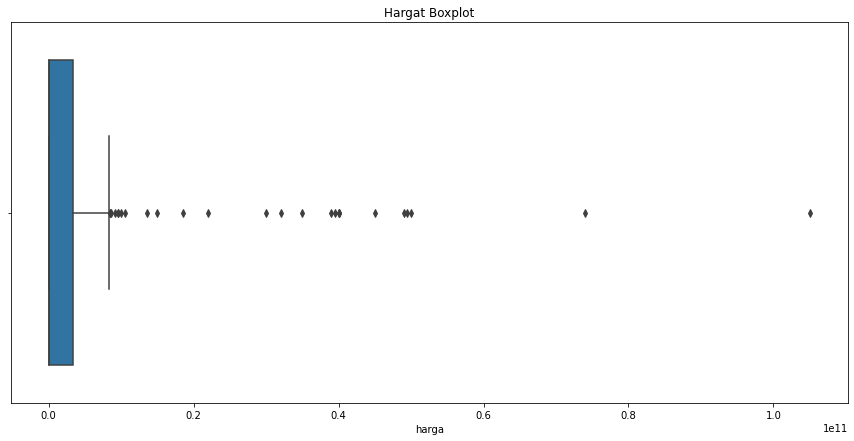

In [230]:
# handle outlier dengan replace menggantinya dengan nilai mean

MFJT['Harga'] = MFJT.harga.mask(MFJT.harga > batasAtas, MFJT.harga.mean())
MFJT['Harga'] = MFJT.harga.mask(MFJT.harga < batasBawah, MFJT.harga.mean())
fig, ax = plt.subplots(figsize = (15,7))
fig = sns.boxplot(x = MFJT.harga).set_title('Hargat Boxplot')

#**4. Statistik Deskriptif**

In [231]:
MFJT.describe()

,LT,LB,KT,KM,garasi,carport,listrik,harga,Harga
count,245.000000,245.000000,245.000000,245.000000,82.000000,182.000000,231.000000,2.450000e+02,2.450000e+02
mean,224.844898,239.004082,3.804082,3.032653,2.024390,1.780220,4722.077922,4.437963e+09,4.437963e+09
std,329.023469,277.110345,1.612701,1.549377,1.684905,1.360876,7389.109908,1.200940e+10,1.200940e+10
min,16.000000,21.000000,1.000000,1.000000,1.000000,1.000000,900.000000,9.500000e+01,9.500000e+01
25%,90.000000,88.000000,3.000000,2.000000,1.000000,1.000000,2200.000000,1.950000e+03,1.950000e+03
50%,144.000000,154.000000,3.000000,3.000000,1.500000,1.000000,2200.000000,1.550000e+04,1.550000e+04
75%,250.000000,300.000000,5.000000,4.000000,2.000000,2.000000,4400.000000,3.400000e+09,3.400000e+09
max,3422.000000,2500.000000,10.000000,10.000000,10.000000,10.000000,66000.000000,1.050000e+11,1.050000e+11


In [232]:
# Statistika Sederhana dari data "Numerik"-nya
MFJT.describe(include='all')

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,Harga
count,245,245.000000,245.000000,245.000000,245.000000,82.000000,182.000000,245,241,231.000000,85,2.450000e+02,245,236,2.450000e+02
unique,22,NaN,NaN,NaN,NaN,NaN,NaN,46,9,NaN,12,NaN,244,223,NaN
top,12-06-2021,NaN,NaN,NaN,NaN,NaN,NaN,"BSD, TANGERANG",SHM,NaN,Utara,NaN,https://www.rumah.com/listing-properti/dijual-...,Dekat dengan berbagai fasilitas seperti :\r\nS...,NaN
freq,102,NaN,NaN,NaN,NaN,NaN,NaN,27,186,NaN,28,NaN,2,8,NaN
mean,NaN,224.844898,239.004082,3.804082,3.032653,2.024390,1.780220,NaN,NaN,4722.077922,NaN,4.437963e+09,NaN,NaN,4.437963e+09
std,NaN,329.023469,277.110345,1.612701,1.549377,1.684905,1.360876,NaN,NaN,7389.109908,NaN,1.200940e+10,NaN,NaN,1.200940e+10
min,NaN,16.000000,21.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,900.000000,NaN,9.500000e+01,NaN,NaN,9.500000e+01
25%,NaN,90.000000,88.000000,3.000000,2.000000,1.000000,1.000000,NaN,NaN,2200.000000,NaN,1.950000e+03,NaN,NaN,1.950000e+03
50%,NaN,144.000000,154.000000,3.000000,3.000000,1.500000,1.000000,NaN,NaN,2200.000000,NaN,1.550000e+04,NaN,NaN,1.550000e+04
75%,NaN,250.000000,300.000000,5.000000,4.000000,2.000000,2.000000,NaN,NaN,4400.000000,NaN,3.400000e+09,NaN,NaN,3.400000e+09


#**5. Visualisasi**

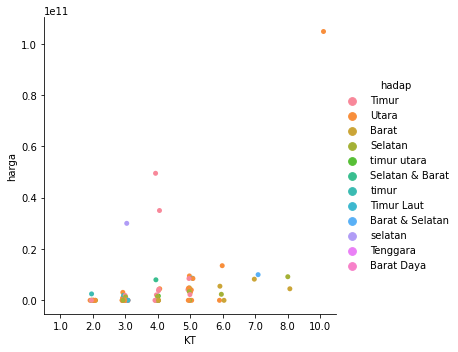

In [233]:
a= sns.catplot(x="KT", y="harga", hue="hadap" , data=MFJT)

Interpretasi :

Dari visualisasi catplot di atas, terdapat rumah hadap Utara dengan kapasitas kamar tidur yang sangat banyak tetapi memiliki harga tinggi, terdapat juga rumah hadap Utara dengan kapasitas kamar tidur cukup banyak (skala 5.0) dengan harga yang lebih rendah/terjangkau. Lalu terdapat rumah hadap Barat dengan kapasitas kamar tidur yang cukup banyak (skala 6.0) tetapi memiliki harga yang terendah/worth it.

Saran:

Jika ingin memiliki rumah yang menerima banyak cahaya matahari pagi dan kamar tidur yang standar, agar memilih rumah menghadap utara dan dengan harga rendah/terjangkau. Sebaliknya, jika ingin memiliki rumah dengan harga terjangkau dan kamar tidur yang banyak, maka pilih rumah hadap barat, tetapi rumah hadap barat memiliki kekurangan yaitu saat siang hari mataharinya akan sangat menyengat ke teras rumah.